# Introduction
Data science is cool! It's not only because the technology it implements is fancy,but also because it stretches our vision to broader scope. In addition to explore new and advanced data science tools and algorithms, we expand our access to new data types as well,including image data, audio data and video data, to extract more integrated and advanced insights from the data world.
As new data types have emerged,python provides new libraries to process and deal with these new data type. This tutorial aims to introduce basic and common concepts and functions of scikit-image library for image processing, and hope you will enjoy and have fun!

### Module:skimage.data
scikit-image has multiple default modules. The data submodule provides a set of functions returning example images. For this tutorial, we will use some of these example images from data module to demonstrate different functions. 
Of course you can also import your own image to test different functions using skimage.io.imread() function. 


### Image Data Representation
Images are consist of pixels, and a digital image is nothing more than numbers indicating color channel combination of red, green, and blue at a particular location on a grid of pixels. 
For scikit-image, images are represented as NumPy arrays. For example, 2-D arrays represent grayscale 2-D images where each element within the array represents the value of pixel corresponding to that index. Hence, we can use large part of functions within NumPy to process image data.

In [29]:
import skimage
import numpy as np
from skimage import data

#get example images: grayscale image
coins = data.coins()
#explore geometry of the image
print coins.shape
#get number of pixels
print coins.size
#explore gray values
print coins.min()
print coins.max()
#look up pixel value
print coins[10, 20]
#set value of a pixel
coins[3, 10] = 0
#indexing with masks of booleans
mask=coins<50
#set pixel value to 0 where mask is true
coins[mask]=0

(303, 384)
116352
1
252
125


Sometimes these indexing functions of Numpy arrays can be very useful to define a region within an image for further process.

### Image Data Type Conversion
Since image data are numpy arrays, there are several different data type of images that skimage supports:


| Data type     |  Range            |
| ------------- |:-----------------:|
| uint8         | 0 to 255          | 
| uint16        | 0 to 65535        |
| uint32        | 0 to 232          | 
| float         | -1 to 1 or 0 to 1 | 
| int8          | -128 to 127       |
| int16         | -32768 to 32767   | 
| int32         | -231 to 231 - 1   | 





Please note that functions within skimage accept any type of these dtypes as input image, but may return different dtype of image. To convert image data to a particular dtype that you need, Do Not use astype function because image data uses different range from all the available range of a certain data type. skimage provides a group of functions to convert dtype of images:


| Function name | Description                       |
| ------------- |:---------------------------------:|
| img_as_float  |Convert to 64-bit floating point.  | 
| img_as_ubyte  |Convert to 8-bit uint.             |
| img_as_uint   |Convert to 16-bit uint.            | 
| img_as_int    |Convert to 16-bit int.             | 


In [30]:
from skimage import img_as_float

image = np.arange(0, 3, 1, dtype=np.int8)
print image
new_image=img_as_float(image)
print new_image

[0 1 2]
[ 0.00392157  0.01176471  0.01960784]


### Color Manipulation
Different color spaces are used to represent colors, and the most common color spaces is the RGB space which represent the color using red, green and blue channels.
A color image is also represented by a Numpy array with an additional dimension for the channels of color space that used. You can implement the same numpy functions to change the pixel value.

(400, 600, 3)


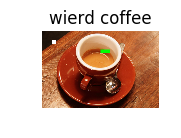

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 1))
ax = plt.subplot(1, 3, 1)

coffee=data.coffee()
print coffee.shape
#set the target pixels to green
coffee[100:120,300:350]=[0, 255, 0] # [red, green, blue]
#set the target pixels to white
coffee[50:70,50:70]=255


ax.imshow(coffee)
ax.set_axis_off()
ax.set_title('wierd coffee')
plt.show()

Of course, skimage provide functions to enable conversion between color images and grayscale images. For example, rgb2gray() can convert an RGB color image to a grayscale image, and to convert a grayscale image to a colorful one you can use gray2rgb().

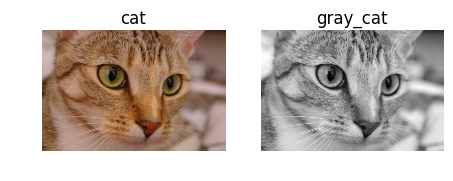

In [18]:
from skimage.color import rgb2gray

cat = data.chelsea()
gray_cat = rgb2gray(cat)

fig = plt.figure(figsize=(8, 2))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax1.imshow(cat)
ax1.set_axis_off()
ax1.set_title('cat')
ax2.imshow(gray_cat,plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('gray_cat')

plt.show()

### Contrast And Exposure
Although image pixels can take value from the whole range of image data dtype, sometimes image pixels only have a narrow range of value or concentrated in a subset of the whole value range. The module skimage.exposure provides multiple functions to change the contrast of an image, by stretching the pixel value into a wider range. For example, rescale_intensity() function uses a linear transformation to stretch the pixel values to the whole range of dtype.

In [19]:
from skimage import exposure
text = data.text()
print text.min(), text.max()
enhance_contrast = exposure.rescale_intensity(text)
print enhance_contrast.min(), enhance_contrast.max()

10 197
0 255


### Module:skimage.filters 
skimage provides different functions to transform image content using different filters, including Frangi filter and Hessian filter. These filters can detect edges of different objects within an image, and replace the pixel value by a function of the values of neighboring pixels.

skimage.filters module also provides multipul functions to get threshold value of pixels within an image based on calculation of histogram of pixel values. For example, skimage.filters.threshold_otsu() return the upper threshold value based on Otsu's method(please note that the imput image must be grayscale one and contains multiple grayscale value). All pixels with a value higher than the threshold are considered to be foregroud of the image.

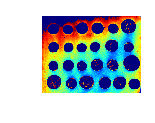

In [12]:
from skimage import filters 
coins = data.coins()
#get upper threshold value of pixels
threshold_value = filters.threshold_otsu(coins)
mask=coins>threshold_value
coins[mask]=0
fig = plt.figure(figsize=(8,1))
ax1 = plt.subplot(1, 3, 1)
ax1.imshow(coins)
ax1.set_axis_off()
plt.show()

The separation of pixels can be used to detect objects of interest and enable image segmentation.

## Image Segmentation
Multiple objects can be contained within one image, and different approaches are needed to process them individually based on specific requirements. Therefore image segmentation should be conducted to seperate objects before further processing, and one way to accomplish segmentation is to detect objects of interest and then to label them. Specifically, once you have separated foreground objects from image,for example, using skimage.filters.threshold_otsu() to identify the upper threshold of backgroud pixel, you can assign different integer labels to each separated object.
The following example separates individual coin from the coins image by applying the following steps:
#### 1.Thresholding foreground with Otsu method.
#### 2.Close small holes within objects of interest. 
Although we identify the threshold to separate foreground from backforund, sometimes within foreground objects, there will be some pixels with lower value than the threshold. Consequently, these pixels will be treated as background and foreground objects will have some "black holes" inside. skimage's measure module provides closing() function to "remove" all small dark spots within objects and "connect" small bright cracks by change pixel value of gaps between bright parts of the object.
#### 3.Remove incomplete objects touching image border. 
#### 4.Measure regions of objects then assign a label for each object.
Pixels are defined as connected when they are neighbors and have the same value. label() function from skimage's measure module will assign a integer value as label to a connected region.

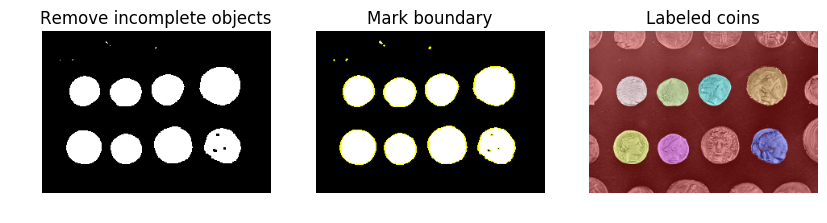

In [80]:
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border,mark_boundaries
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

coin = data.coins()[50:-50, 50:-50]

# apply threshold
thresh = threshold_otsu(coin)
mask=coin>thresh
closed = closing(mask, square(3))

# remove incomplete objects from image border
cleared = clear_border(closed)
coins_edges = mark_boundaries(cleared, cleared.astype(np.int))
# label coin regions
label_image = label(cleared)
colorfulimage = label2rgb(label_image, image=coin)

fig = plt.figure(figsize=(10, 6))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
ax1.imshow(cleared,cmap='gray')
ax1.set_axis_off()
ax1.set_title('Remove incomplete objects')
ax2.imshow(coins_edges, cmap='gray')
ax2.set_axis_off()
ax2.set_title('Mark boundary')
ax3.imshow(colorfulimage)
ax3.set_axis_off()
ax3.set_title('Labeled coins')

plt.show()

## Object Detection
Another main task for image processing is to detect the existence and location of certain objects within an image. 
A common approach is corner detection. Scikit-image has a whole bunch of algorithms, but for this tutorial we will use  Harris method for its simplicity. 
#### The Harris algorithm 
The harris algorithm is implemented by corner_harris() function from skimage's feature module. The function returns a matrix holding confidence values of corners, and the higher the value, the more likely that coordinate is a corner. The corner_peaks() function can find corners in the returned response image then return a list of coordinates of those corners.

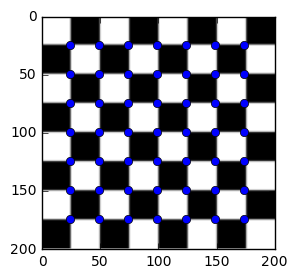

In [88]:
from skimage.feature import corner_harris,corner_peaks

checkerboard = data.checkerboard()
corners = corner_peaks(corner_harris(checkerboard),min_distance=2)
fig = plt.figure(figsize=(3, 3))
plt.imshow(checkerboard,cmap='gray')
y_corner,x_corner = zip(*corners)
# Plot corners
plt.plot(x_corner,y_corner,'o') 
plt.xlim(0,checkerboard.shape[1])
plt.ylim(checkerboard.shape[0],0)

plt.show()

#### Template Matching
Template matching can be used to identify the occurrence of an image patch, or what we define as a template. The match_template() function will compare the pixel value of the template and the image to be matched, then returns an array with values between -1.0 and 1.0. The value at a given position corresponds to the correlation coefficient between the image and the template, and the maximum value in the match_template() result corresponds to the matched area. 
In the following example, we define the lens of a camera as a template. Then we detect and locate the matched area in the camera image and mark the area of matched lens.

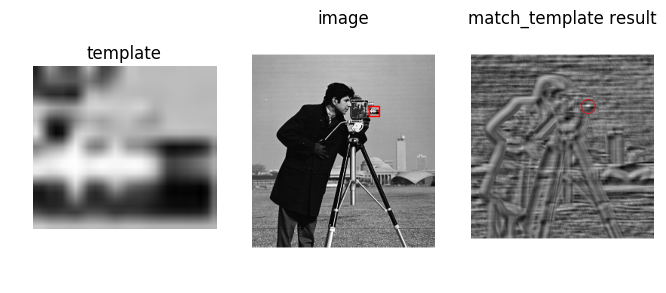

In [58]:
from skimage.feature import match_template

camera = data.camera()
lens = camera[135:160, 310:338]

result = match_template(camera, lens)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(lens, plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(camera, plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hlens, wlens = lens.shape
rect = plt.Rectangle((x, y), wlens, hlens, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result, plt.cm.gray)
ax3.set_axis_off()
ax3.set_title('match_template result')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

By detecting and separating objects within images, we can "tell" the machine learning algorithms or other analysis tools that where the objects of interest are exactly located in the image. And these approaches are Step One before we feed these images into machine learning algorithms for further insight.

This tutorial provides a glimpse for image processing, and there are other approaches that scikit-image can accomplish. You can visit http://scikit-image.org/ for more information and advanced examples, and I hope you find this tutorial is helpful to get some insight about image data processing.